# Project Description
Douglas Maxwell
CPSC 480 - Machine Learning

#### Objective:
This project aims to analyze and model weather patterns using data collected during World War II. By leveraging historical weather data, the goal is to understand the relationships between various weather attributes and predict daily precipitation levels. Insights from this analysis can serve to shed light on historical weather patterns and provide a foundation for comparative studies with contemporary data.

#### Dataset:
The dataset contains daily weather reports from weather stations across the globe, spanning the World War II era. Key attributes include temperature readings, wind speeds, and precipitation levels, among others.

#### Findings:
The analysis revealed specific relationships between weather attributes and demonstrated the challenges and nuances of modeling historical weather data. While the linear regression model provided certain predictive capabilities, there's potential for further optimization and exploration with more complex algorithms and feature engineering techniques.

# Get the data

My dataset comes from Kaggle. Link: https://www.kaggle.com/datasets/smid80/weatherww2/.
It describes weather conditions over several days of WWII from different weather stations around the world.

In [30]:
import zipfile
import os

zip_file_path = 'data/ww2_weather.zip'

extracted_dir_path = 'data/ww2_weather'

# Create the directory if it does not exist
os.makedirs(extracted_dir_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

extracted_files = os.listdir(extracted_dir_path)
extracted_files

['Summary of Weather.csv', 'Weather Station Locations.csv']

# Using Datafame

In [31]:
import pandas as pd

summary_of_weather_filepath = os.path.join(extracted_dir_path, 'Summary of Weather.csv')
summary_of_weather_df = pd.read_csv(summary_of_weather_filepath)

summary_of_weather_df.head()


C:\Users\dmaxw\AppData\Local\Temp\ipykernel_6960\4196125109.py:4: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  summary_of_weather_df = pd.read_csv(summary_of_weather_filepath)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
weather_station_locations_filepath = os.path.join(extracted_dir_path, 'Weather Station Locations.csv')
weather_station_locations_df = pd.read_csv(weather_station_locations_filepath)

weather_station_locations_df.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [33]:
summary_of_weather_df.info()

summary_of_weather_df.describe(include='all').transpose()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
STA,119040.0,NaN,NaN,NaN,29659.435795,20953.209402,10001.0,11801.0,22508.0,33501.0,82506.0
Date,119040,2192,1945-4-16,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precip,119040,540,0,64267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpd,532.0,NaN,NaN,NaN,37.774534,10.297808,18.52,29.632,37.04,43.059,75.932
MaxTemp,119040.0,NaN,NaN,NaN,27.045111,8.717817,-33.333333,25.555556,29.444444,31.666667,50.0
MinTemp,119040.0,NaN,NaN,NaN,17.789511,8.334572,-38.333333,15.0,21.111111,23.333333,34.444444
MeanTemp,119040.0,NaN,NaN,NaN,22.411631,8.297982,-35.555556,20.555556,25.555556,27.222222,40.0
Snowfall,117877.0,42.0,0.0,86090.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PoorWeather,34237,39,1,25846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR,119040.0,NaN,NaN,NaN,43.805284,1.136718,40.0,43.0,44.0,45.0,45.0


A few things to note:
- The dataset contains 119,040 entries and 31 columns.
- The `Precip` column, which we aim to predict, is of object type. We will need to convert it to a numerical type.
- Several columns have a large number of missing values (e.g., WindGustSpd, PoorWeather, PGT, and columns FT to WTE).
- The `Date` column is also of object type, and converting it to a datetime format will help in handling time series data.

In [34]:
# Check if there are any weather stations in 'summary_of_weather_df' that are not present in 'weather_station_locations_df'
missing_stations = set(summary_of_weather_df['STA']) - set(weather_station_locations_df['WBAN'])
missing_stations


set()

Merge the datasets

In [35]:
# Merge the weather data with the station locations data on the station ID
merged_df = pd.merge(summary_of_weather_df, weather_station_locations_df, left_on='STA', right_on='WBAN', how='left')

# Drop the 'WBAN' column as it is redundant after the merge
merged_df.drop(columns=['WBAN'], inplace=True)

# Display the first few rows of the merged DataFrame
merged_df.head()


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,RHN,RVG,WTE,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,ACCRA,GH,0536N,00010W,62,5.6,-0.3
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,ACCRA,GH,0536N,00010W,62,5.6,-0.3
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,ACCRA,GH,0536N,00010W,62,5.6,-0.3
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,ACCRA,GH,0536N,00010W,62,5.6,-0.3
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,ACCRA,GH,0536N,00010W,62,5.6,-0.3


# Visualizing the dataset

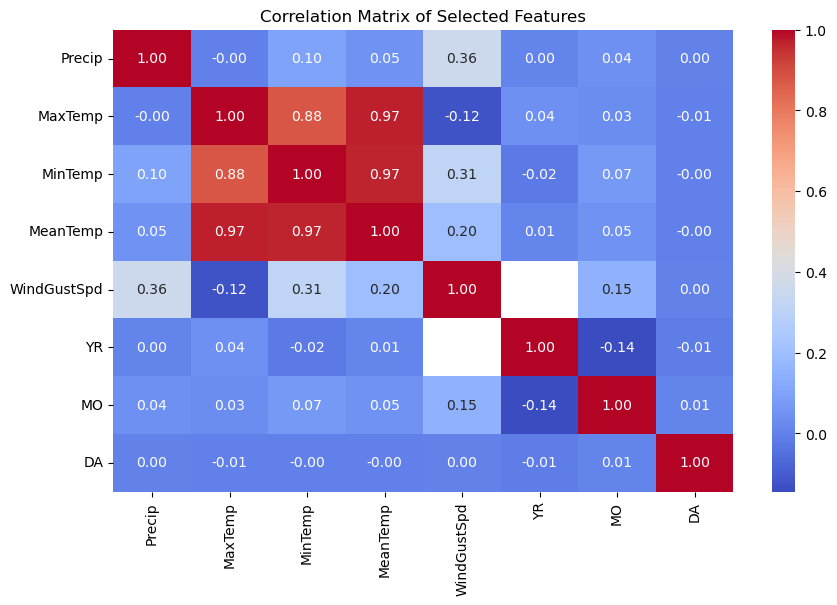

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

#handle non-numeric values
merged_df['Precip'] = pd.to_numeric(summary_of_weather_df['Precip'], errors='coerce')

selected_features = ['Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'WindGustSpd', 'YR', 'MO', 'DA']

corr_matrix = merged_df[selected_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()


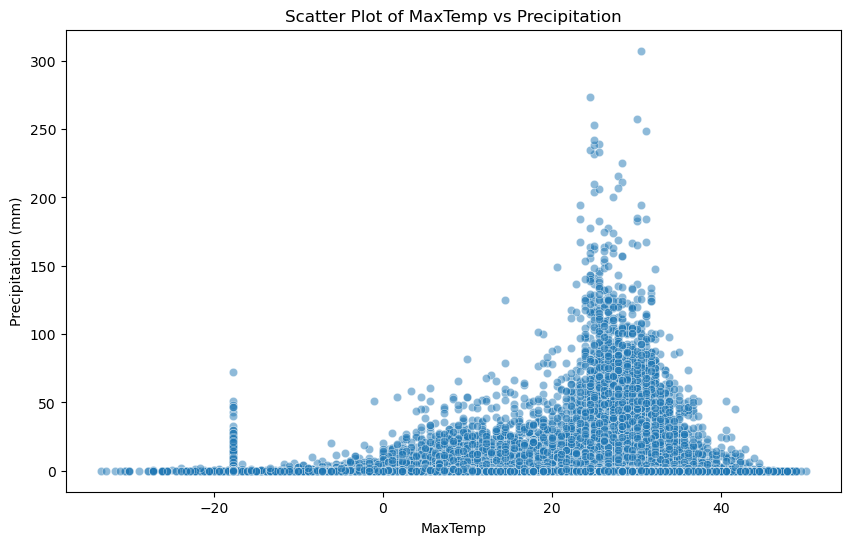

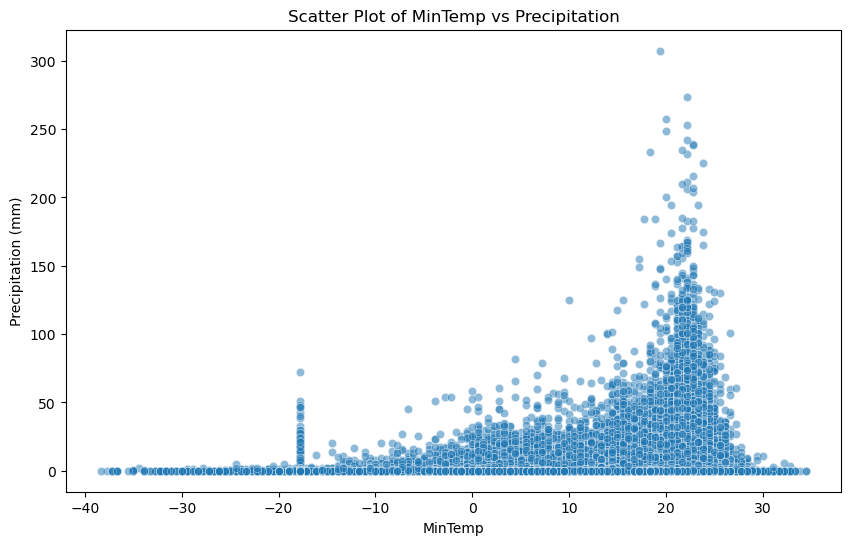

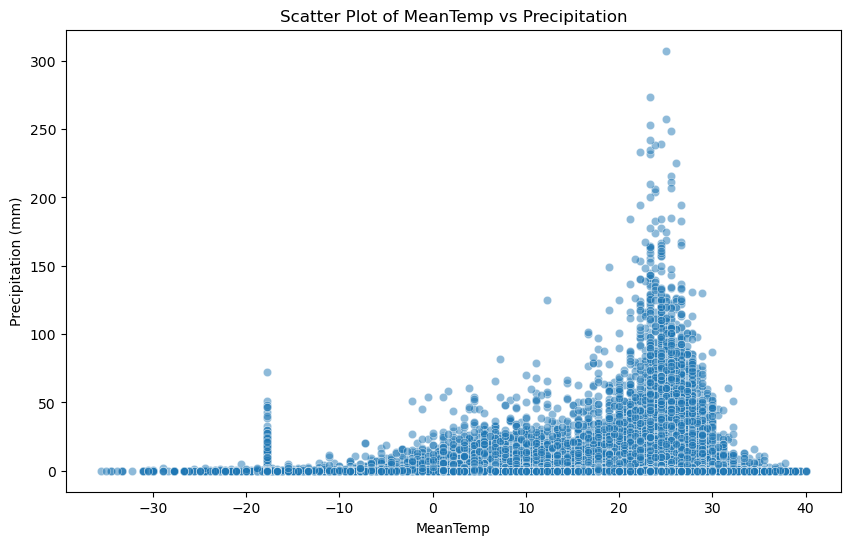

In [37]:
# Scatter plots for numerical features against 'Precip'
numerical_features = ['MaxTemp', 'MinTemp', 'MeanTemp']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=merged_df, x=feature, y='Precip', alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs Precipitation')
    plt.ylabel('Precipitation (mm)')
    plt.show()


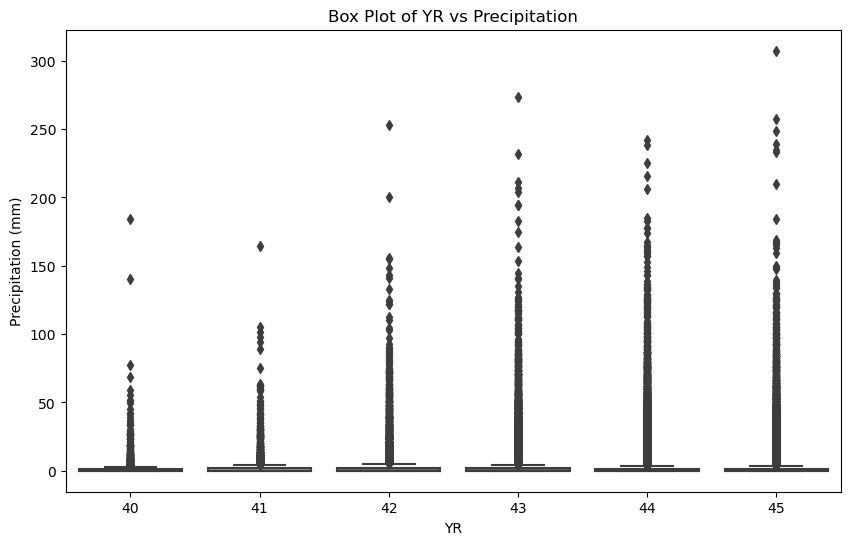

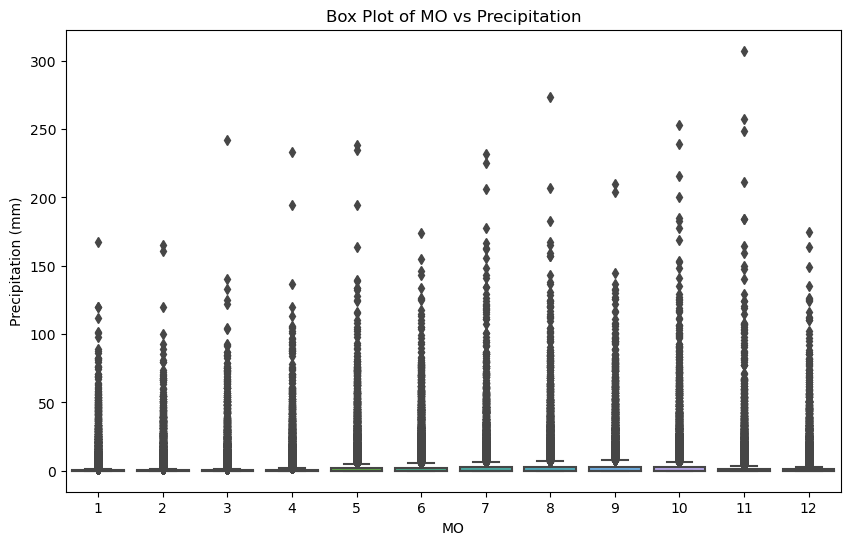

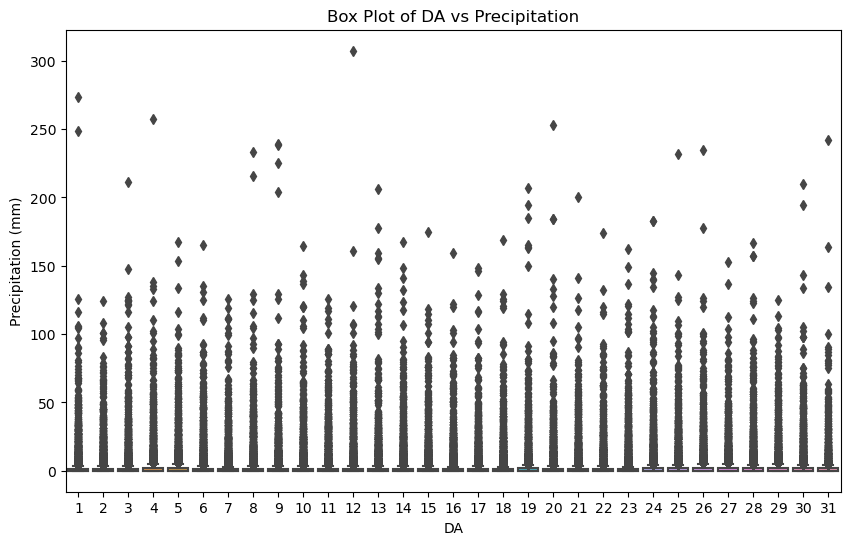

In [38]:
# Box plots for categorical features (Year, Month, Day) against 'Precip'
categorical_features = ['YR', 'MO', 'DA']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=merged_df, x=feature, y='Precip')
    plt.title(f'Box Plot of {feature} vs Precipitation')
    plt.ylabel('Precipitation (mm)')
    plt.show()


C:\Users\dmaxw\AppData\Local\Temp\ipykernel_6960\756354385.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


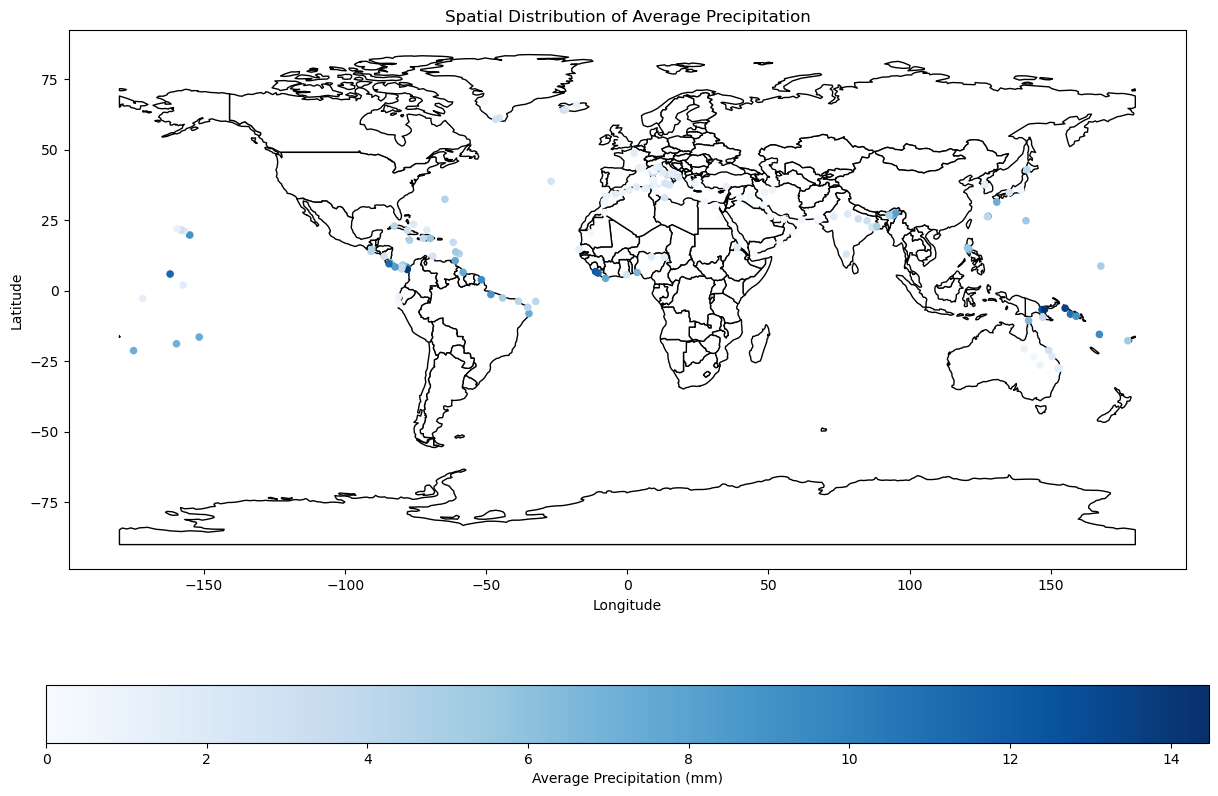

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Coerce non-numeric values to NaN in the 'Precip' column
merged_df['Precip'] = pd.to_numeric(merged_df['Precip'], errors='coerce')

# Calculate the average precipitation for each station
avg_precipitation = merged_df.groupby(['STA', 'Latitude', 'Longitude'])['Precip'].mean().reset_index()

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(avg_precipitation, geometry=gpd.points_from_xy(avg_precipitation.Longitude, avg_precipitation.Latitude))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 10), color='white', edgecolor='black')
gdf.plot(ax=ax, markersize=20, column='Precip', cmap='Blues', legend=True, legend_kwds={'label': "Average Precipitation (mm)", 'orientation': "horizontal"})

plt.title('Spatial Distribution of Average Precipitation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



# Preprocessing

In [40]:
# Check the DataFrame for missing values
missing_values = merged_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

WTE            119040
FB             119040
RVG            119040
RHN            119040
RHX            119040
SD3            119040
ITH            119040
FTI            119040
FT             119040
PGT            118515
SPD            118508
WindGustSpd    118508
DR             118507
SND            113477
TSHDSBRSGF      84803
PoorWeather     84803
Precip          16753
PRCP             1932
SNF              1163
Snowfall         1163
MEA               498
MAX               474
MIN               468
dtype: int64

In [41]:
# Calculate the percentage of missing values for each column
missing_percentage = merged_df.isnull().mean() * 100
missing_percentage.sort_values(ascending=False, inplace=True)
print(missing_percentage)

RHN                 100.000000
RVG                 100.000000
RHX                 100.000000
SD3                 100.000000
ITH                 100.000000
FTI                 100.000000
FB                  100.000000
FT                  100.000000
WTE                 100.000000
PGT                  99.558972
SPD                  99.553091
WindGustSpd          99.553091
DR                   99.552251
SND                  95.326781
TSHDSBRSGF           71.239079
PoorWeather          71.239079
Precip               14.073421
PRCP                  1.622984
SNF                   0.976983
Snowfall              0.976983
MEA                   0.418347
MAX                   0.398185
MIN                   0.393145
LAT                   0.000000
LON                   0.000000
ELEV                  0.000000
Latitude              0.000000
STATE/COUNTRY ID      0.000000
NAME                  0.000000
STA                   0.000000
Date                  0.000000
DA                    0.000000
MO      

In [42]:
# Drop the columns with more than 70% missing values
# Set a threshold for dropping columns
threshold = 70

# Identify and drop columns with a high percentage of missing values
columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()
# Redundant columns
reduntant_columns = ['PRCP', 'MAX', 'MIN', 'MEA', 'SNF', 'LAT', 'LON', 'Date']

columns_to_drop += reduntant_columns;
merged_df.drop(columns=columns_to_drop, inplace=True)
merged_df.head()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,NAME,STATE/COUNTRY ID,ELEV,Latitude,Longitude
0,10001,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,ACCRA,GH,62,5.6,-0.3
1,10001,0.000,28.888889,21.666667,25.555556,0.0,42,7,2,ACCRA,GH,62,5.6,-0.3
2,10001,2.540,26.111111,22.222222,24.444444,0.0,42,7,3,ACCRA,GH,62,5.6,-0.3
3,10001,2.540,26.666667,22.222222,24.444444,0.0,42,7,4,ACCRA,GH,62,5.6,-0.3
4,10001,0.000,26.666667,21.666667,24.444444,0.0,42,7,5,ACCRA,GH,62,5.6,-0.3


In [43]:
# List of numerical columns with missing values
numerical_columns_with_missing_values = ['Precip', 'Snowfall']

# Replacing 'T' values with a small number and converting to numeric
for column in numerical_columns_with_missing_values:
    merged_df[column] = merged_df[column].replace('T', 0.001).apply(pd.to_numeric, errors='coerce')
    merged_df[column].fillna(merged_df[column].mean(), inplace=True)

# Checking the DataFrame for missing values after imputation
missing_values_after_imputation = merged_df.isnull().sum()
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0].sort_values(ascending=False)
missing_values_after_imputation

Series([], dtype: int64)

In [44]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119040 entries, 0 to 119039
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   STA               119040 non-null  int64  
 1   Precip            119040 non-null  float64
 2   MaxTemp           119040 non-null  float64
 3   MinTemp           119040 non-null  float64
 4   MeanTemp          119040 non-null  float64
 5   Snowfall          119040 non-null  float64
 6   YR                119040 non-null  int64  
 7   MO                119040 non-null  int64  
 8   DA                119040 non-null  int64  
 9   NAME              119040 non-null  object 
 10  STATE/COUNTRY ID  119040 non-null  object 
 11  ELEV              119040 non-null  int64  
 12  Latitude          119040 non-null  float64
 13  Longitude         119040 non-null  float64
dtypes: float64(7), int64(5), object(2)
memory usage: 13.6+ MB


# Splitting the data into Train and Test

In [45]:
from sklearn.model_selection import train_test_split

# Defining the features (X) and the target (y). Drop categorical columns and the target column
X = merged_df.drop(columns=['Precip', 'NAME', 'STATE/COUNTRY ID'])
y = merged_df['Precip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((95232, 11), (23808, 11))

# Selecting a model and training it

In [46]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)


# Accuracy of the model

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

rmse

10.477119119351842

# Cross validation with 10 folds

In [48]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='neg_mean_squared_error')

cv_rmse_scores = np.sqrt(-cv_scores)

# Display score function from https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(cv_rmse_scores)


Scores: [16.51193704 12.23727996 10.60059927  6.2877793   8.42110633  6.78571822
  9.27329691  4.79175318 10.05710574 14.46809704]
Mean: 9.94346729818986
Standard deviation: 3.492358591615593
